In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. FORCE STABILITY BEFORE ANY IMPORTS
# These must be the first lines executed
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_DEBUG_CPU_TYPE"] = "5" # Forces a stable math path for Windows

# 2. Path Logic
root_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if root_path not in sys.path:
    sys.path.append(root_path)

# 3. TEST LOAD
try:
    print(f"🚀 Kernel alive at: {sys.executable}")
    import pandas as pd
    print("✅ Pandas loaded successfully!")
except Exception as e:
    print(f"❌ Load failed: {e}")

🚀 Kernel alive at: c:\datascience_portfolio\venv\Scripts\python.exe
✅ Pandas loaded successfully!


In [2]:
# Path logic: go up one level from 'notebooks' to 'sports_analytics', then into 'data'
# This matches your specific sports_analytics folder structure
data_path = os.path.join('..', 'data', 'sports_data.csv')

if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("✅ Sports Performance Data Loaded Successfully")
    display(df.head())
else:
    # Adding an absolute path print makes debugging easier if it fails
    print(f"❌ Error: CSV file not found at {os.path.abspath(data_path)}")

✅ Sports Performance Data Loaded Successfully


,Player_ID,Player_Name,Team,Matches_Played,Goals,Assists,Pass_Accuracy,Distance_Covered_km,Yellow_Cards,Market_Value_M
0,101,Lionel Messi,Inter Miami,25,22,15,89.5,210.4,1,35.0
1,102,Cristiano Ronaldo,Al Nassr,28,24,8,82.1,230.5,4,15.0
2,103,Kylian Mbappe,Real Madrid,22,19,10,85.4,245.2,2,180.0
3,104,Erling Haaland,Man City,24,28,5,78.9,205.1,3,180.0
4,105,Kevin De Bruyne,Man City,18,5,18,91.2,198.7,2,60.0


In [3]:
# Create a performance metric for offensive impact
df['Goal_Contribution'] = df['Goals'] + df['Assists']

# Calculate Efficiency (Goals per Match)
df['Goals_Per_Match'] = (df['Goals'] / df['Matches_Played']).round(2)

print("Feature Engineering Complete: Metrics 'Goal_Contribution' and 'Goals_Per_Match' added.")

Feature Engineering Complete: Metrics 'Goal_Contribution' and 'Goals_Per_Match' added.


In [4]:
# 1. Top 5 Players by Goal Contribution
top_performers = df.nlargest(5, 'Goal_Contribution')[['Player_Name', 'Team', 'Goal_Contribution']]
print("Top 5 Offensive Performers:")
print(top_performers)

# 2. Average Market Value by Team
avg_team_value = df.groupby('Team')['Market_Value_M'].mean().sort_values(ascending=False)
print("\nAverage Market Value by Team (Millions):")
print(avg_team_value)

Top 5 Offensive Performers:
         Player_Name           Team  Goal_Contribution
0       Lionel Messi    Inter Miami                 37
8         Harry Kane  Bayern Munich                 34
3     Erling Haaland       Man City                 33
1  Cristiano Ronaldo       Al Nassr                 32
5      Mohamed Salah      Liverpool                 30

Average Market Value by Team (Millions):
Team
Real Madrid      163.333333
Arsenal          120.000000
Man City         120.000000
Bayern Munich    100.000000
Liverpool         55.000000
Inter Miami       35.000000
Al Nassr          15.000000
Name: Market_Value_M, dtype: float64


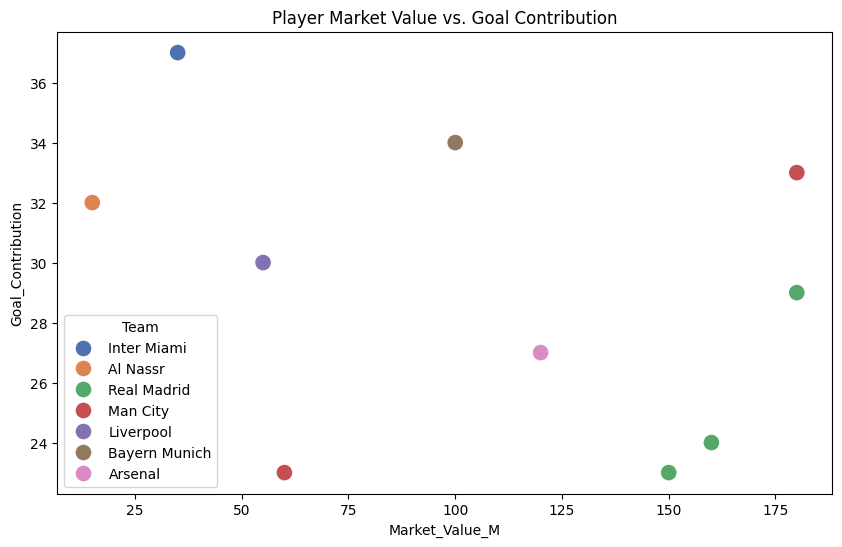

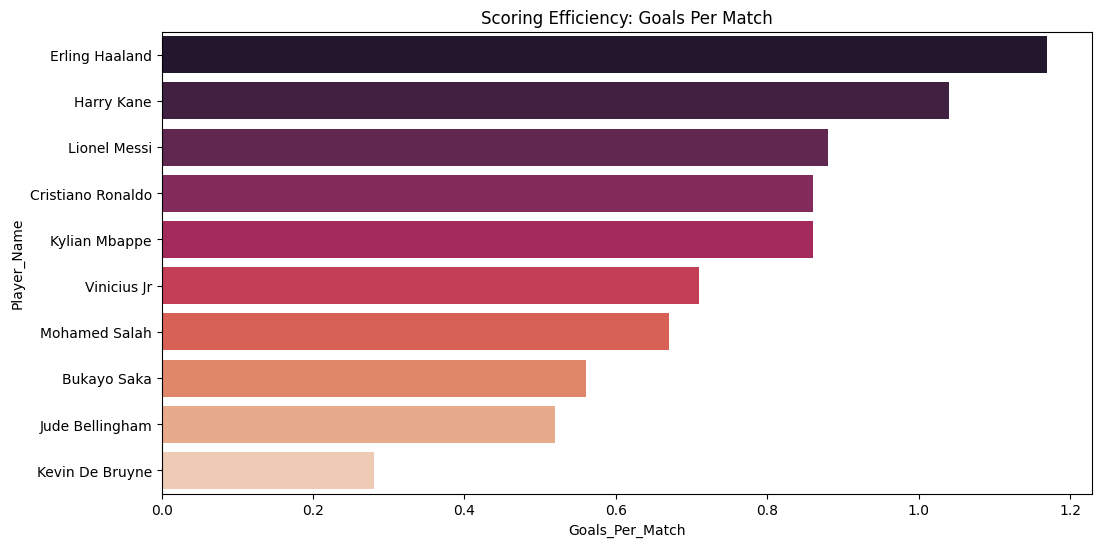

In [5]:


# 1. Create visualization folder if it doesn't exist
# Using relative path '..' ensures it stays inside 'sports_analytics'
viz_path = os.path.join('..', 'visualizations')
os.makedirs(viz_path, exist_ok=True)

# 2. Chart 1: Market Value vs Performance
plt.figure(figsize=(10, 6))
# Using verified columns from your sports dataset
sns.scatterplot(data=df, x='Market_Value_M', y='Goal_Contribution', hue='Team', s=150, palette='deep')
plt.title('Player Market Value vs. Goal Contribution')
plt.savefig(os.path.join(viz_path, 'sports_value_vs_impact.png'))
plt.show()

# 3. Chart 2: Efficiency Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values('Goals_Per_Match', ascending=False), 
            x='Goals_Per_Match', y='Player_Name', hue='Player_Name', legend=False, palette='rocket')
plt.title('Scoring Efficiency: Goals Per Match')
plt.savefig(os.path.join(viz_path, 'sports_player_efficiency.png'))
plt.show()

In [6]:


# 1. Select features
features = ['Goal_Contribution', 'Goals_Per_Match', 'Market_Value_M']
x = df[features]

# 2. Scale data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 3. Apply KMeans (n_init is required to avoid future warnings)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Player_Tier'] = kmeans.fit_predict(x_scaled)

# 4. Map Clusters
tier_map = {0: 'Consistent Starter', 1: 'Elite/High Value', 2: 'High Impact/Prospect'}
df['Tier_Name'] = df['Player_Tier'].map(tier_map)

print("✅ Machine Learning Clustering Complete!")
display(df[['Player_Name', 'Team', 'Tier_Name']].head(10))

✅ Machine Learning Clustering Complete!


,Player_Name,Team,Tier_Name
0,Lionel Messi,Inter Miami,High Impact/Prospect
1,Cristiano Ronaldo,Al Nassr,High Impact/Prospect
2,Kylian Mbappe,Real Madrid,Consistent Starter
3,Erling Haaland,Man City,Consistent Starter
4,Kevin De Bruyne,Man City,Elite/High Value
5,Mohamed Salah,Liverpool,High Impact/Prospect
6,Jude Bellingham,Real Madrid,Elite/High Value
7,Vinicius Jr,Real Madrid,Elite/High Value
8,Harry Kane,Bayern Munich,Consistent Starter
9,Bukayo Saka,Arsenal,Elite/High Value
